In [1]:
import pandas as pd
import numpy as np

from python.parameters import *
from python.components import *
from python.utils import *
from python.experiment import *

In [2]:
components_csv = 'data/components.csv'
eclipse_csv = 'data/STK/Satellite_Eclipse_Times.csv'
solar_angles_csv = 'data/STK/Satellite_solar_angles.csv'
target_csv = 'data/STK/Satellite_Satellite_Sensor_Hyperscout2_To_AreaTarget_Europe_Access.csv'
GS_0_csv = 'data/STK/Satellite-Satellite-To-Facility-Esrange_Station_ESC-Sensor-Esrange_Access.csv'
GS_1_csv = 'data/STK/Satellite-Satellite-To-Facility-Svalsat_SG_1_STDN_SG1S-Sensor-Svalbard_Access.csv'

In [3]:
eclipse_df = pd.read_csv(eclipse_csv)
solar_angles_df = pd.read_csv(solar_angles_csv)
target_df = pd.read_csv(target_csv)
GS_0_df = pd.read_csv(GS_0_csv)
GS_1_df = pd.read_csv(GS_1_csv)

In [4]:
components_params = csvtoparameters(components_csv)
solar_params = SolarCellParameters()
battery_params = BatteryCellParameters()
ttc_params = TTCParameters()
payload_params = PayloadParameters()

In [5]:
# solar_panels = [
#     SolarPanel(solar_params, eclipse_df, n_series=6, n_parallel=4)
# ]
solar_panels = [
    SolarPanel(solar_params, eclipse_df, n_series=6, n_parallel=4, face='x', angle_data=solar_angles_df),
    SolarPanel(solar_params, eclipse_df, n_series=6, n_parallel=2, face='z', angle_data=solar_angles_df),
]

components = list()
for params in components_params:
    components.append(Component(params, eclipse_df))

battery_packs = [
    BatteryPack(battery_params, n_series=4, n_parallel=4)
]

ttcs = [
    TTC(ttc_params, mode='S-band', sunlight=True, target=False, GS_data=[GS_0_df, GS_1_df], eclipse_data=eclipse_df)
]

payload = Payload(payload_params, target_df, eclipse_df)

In [6]:
schedules = {
    'day_1': ['acquisition', 'elaboration']
}

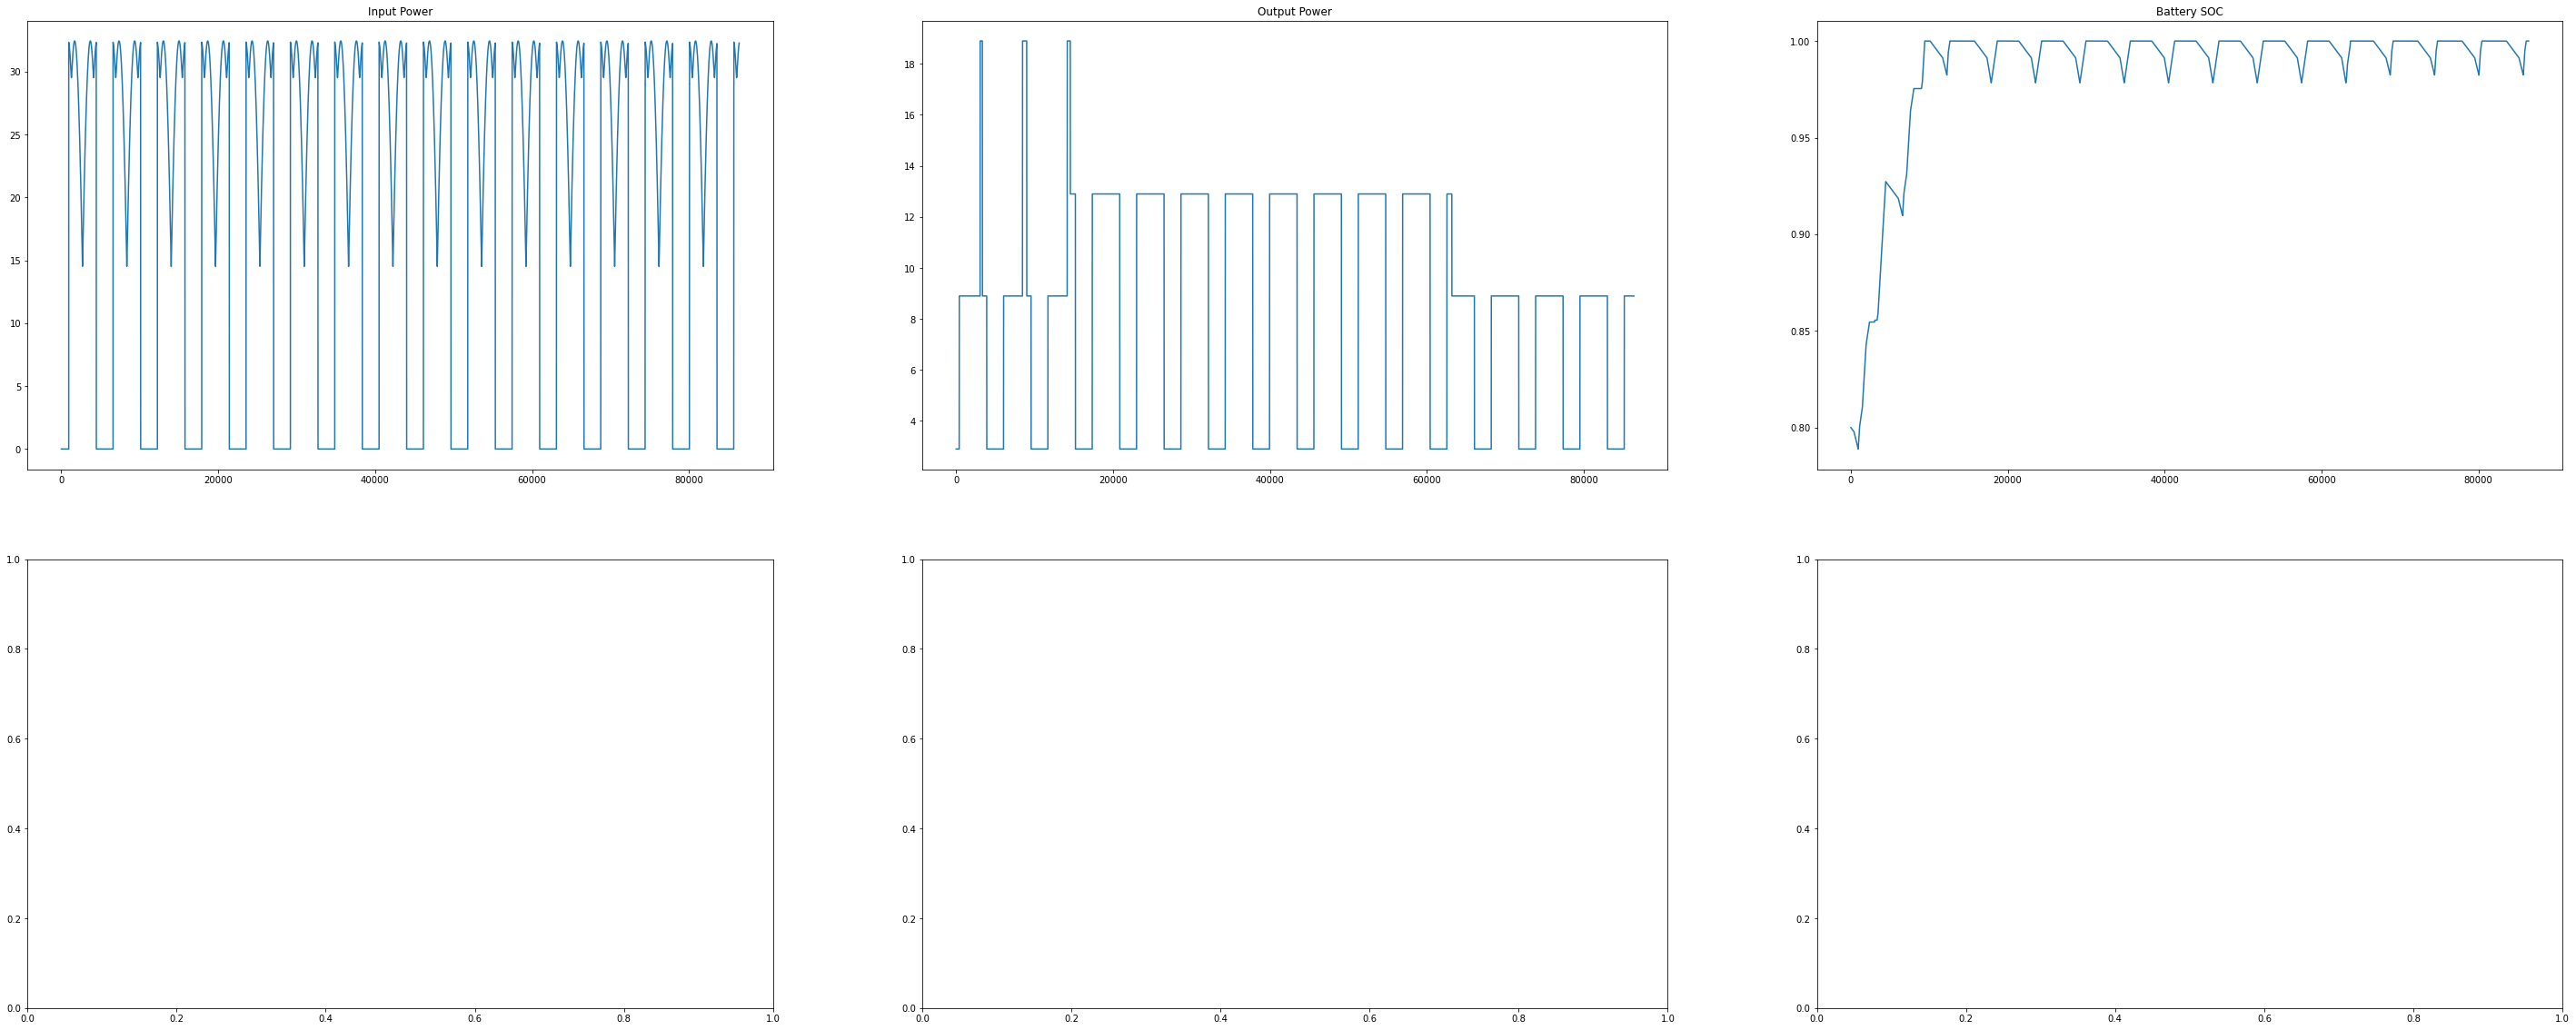

In [7]:
skiptime = 3600 * 8
comps = list()
comps += components + ttcs + [payload]
for comp in comps:
    comp.step(skiptime)

day(schedules['day_1'], 
    payload,
    solar_panels,
    battery_packs,
    ttcs,
    components)